## Importing the required modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pylab as pl
import pandas as pd
import os
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
from sklearn.cluster import KMeans
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import h5py

# **K-Nearest Neighbours**

## Reading the Train and test sets

In [2]:
#for the train_data
train_data = pd.read_csv('train.csv')
y_train = train_data['Activity']
X_train = train_data.drop(columns = ['Activity', 'subject'])

#for the test_data
test_data = pd.read_csv('test.csv')
y_test = test_data['Activity']
X_test = test_data.drop(columns = ['Activity', 'subject'])

## **Check if the classes are equally shared**

([<matplotlib.patches.Wedge at 0x25ea6340e80>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

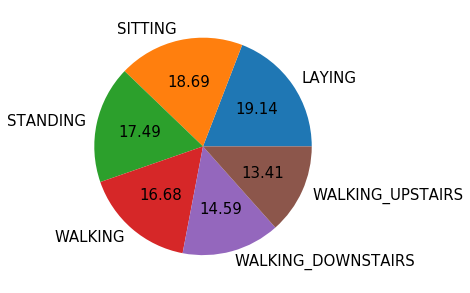

In [3]:
# Count the number of records for each activity
count_of_each_activity = np.array(y_train.value_counts())

# Identify all the unqiue activities and in sorted order
activities = sorted(y_train.unique())

# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [5, 5], 'font.size': 15})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

## **Cross validation on KNN**

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
# consider a set of values for number of neighbors (K) as shown below for finding out the otimal number of neighbors.
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation (cv=10)
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    #scores is an array of accuracies obtained for each fold considering the number of neighbors as k
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    #store the mean of the accuracies of all the folds in cv_scores array
    cv_scores.append(scores.mean())


## **Elbow method**

<Figure size 360x360 with 0 Axes>

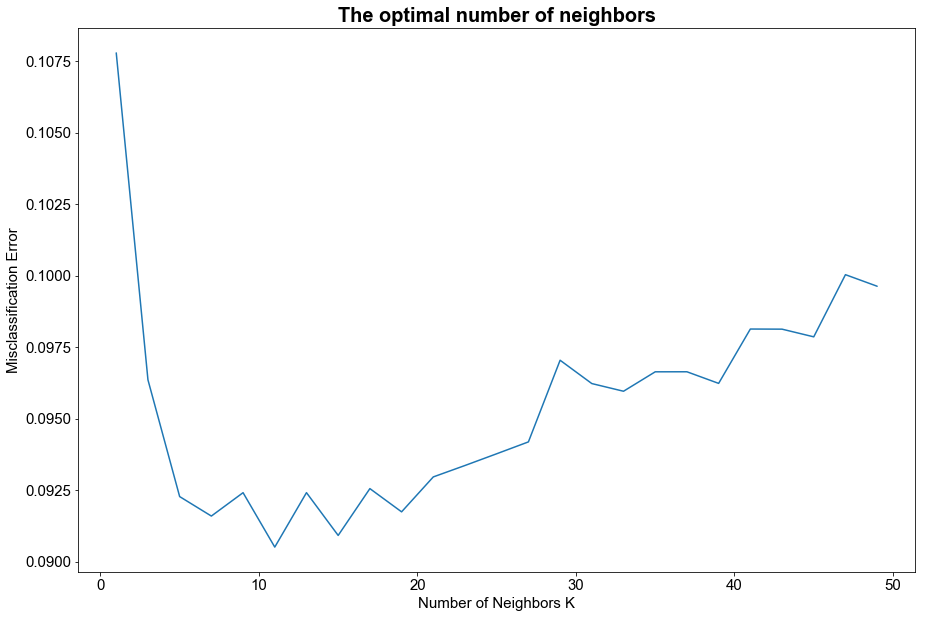

In [5]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
#plot between number of neighboes (K) and misclassification error also called elbow method.
plt.plot(k_list, MSE)

plt.show()

In [6]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 11.


## **Applying KNN with K=11 (optimal number of neighbours)**

In [7]:
knn = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)

# accuracy on X_train
accuracy_knn_train = knn.score(X_train, y_train) 
print(accuracy_knn_train)

# creating a confusion matrix for training dataset 
knn_predictions_train = knn.predict(X_train)  
cm_train = confusion_matrix(y_train, knn_predictions_train)
print(cm_train)
print("------------------------------")
# accuracy on X_test 
accuracy_knn_test = knn.score(X_test, y_test) 
print(accuracy_knn_test)
  
# creating a confusion matrix 
knn_predictions_test = knn.predict(X_test)  
cm_test = confusion_matrix(y_test, knn_predictions_test)
print(cm_test)

0.9741566920565833
[[1405    2    0    0    0    0]
 [   4 1151  130    0    0    1]
 [   0   41 1333    0    0    0]
 [   0    0    0 1226    0    0]
 [   0    0    0    3  977    6]
 [   0    0    0    3    0 1070]]
------------------------------
0.9039701391245334
[[534   2   1   0   0   0]
 [  0 389  98   0   0   4]
 [  0  35 497   0   0   0]
 [  0   0   0 487   9   0]
 [  0   0   0  48 332  40]
 [  0   0   0  37   9 425]]


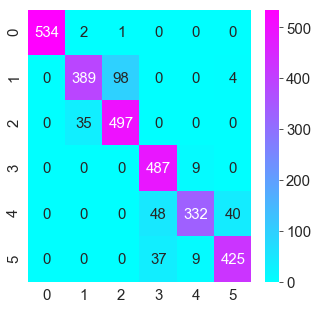

In [8]:
s = sns.heatmap(cm_test, cmap = "cool",annot=True,fmt='d')

# **Support Vector Machine**

## Splitting the dataset into Train and test sets

In [13]:
train = shuffle(pd.read_csv("train.csv"))
test = shuffle(pd.read_csv("test.csv"))

## Dropping  the result and subject columns

In [14]:
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))  
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test_label = test.Activity.values.astype(object)

### Transforming the non numeric labels of the target column into numeric labels

In [15]:
encoder = preprocessing.LabelEncoder()

"""encoding train labels"""
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

"""encoding test labels """
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

### Scaling the Train and Test feature set using StandardScaler

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Create the parameter grid based on the results of random search.

In [17]:
'''It consists of two different types of kernels - The radial basis function (rbf) and the linear kernel'''

params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

### Performing CV to tune parameters for best SVM fit with 5 fold cross validation

In [18]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Best score for training data, Best kernel, C and gamma

In [19]:
print('Best score for training data:', svm_model.best_score_,"\n") #gives the estimator with the highest score out of the above rbf and linear kernel
final_model = svm_model.best_estimator_  
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

#The below score is the score of the best estimator
print('Best Kernel with minimum classification error:',svm_model.best_estimator_.kernel)
print('Best C:',svm_model.best_estimator_.C) 
print('Best Gamma:',svm_model.best_estimator_.gamma)
#Turns out the bast kernel is the radial basis fuction(rbf)

Best score for training data: 0.9870783460282916 

Best Kernel with minimum classification error: rbf
Best C: 100
Best Gamma: 0.001


### Precision, recall, f1-score, support for each of the activities and the testing set accuracy

In [20]:
print(classification_report(Y_test_label,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train)) #Mean cross-validated score of the best_estimator
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))


                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.98      0.97       496
WALKING_DOWNSTAIRS       0.98      0.93      0.95       420
  WALKING_UPSTAIRS       0.93      0.96      0.95       471

         micro avg       0.96      0.96      0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

Training set score for SVM: 1.000000
Testing  set score for SVM: 0.958602


### Constructing the Confusion Matrix for true label vs predicted label for classification

[Text(32.09374999999999, 0.5, 'True Label'),
 Text(0.5, 14.09375, 'Predicted Label')]

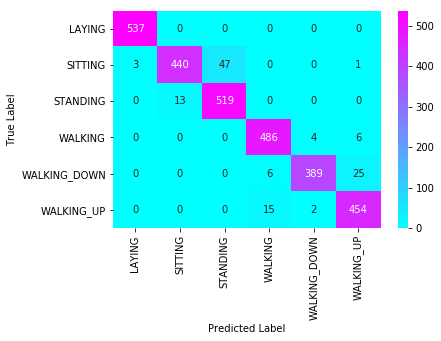

In [21]:
l = [0,0,0,0,0,0]

label_acc = [l.copy(), l.copy(), l.copy(), l.copy(), l.copy(), l.copy()]
for i in range(len(Y_test)):
    label_acc[Y_test[i]][Y_pred[i]] += 1

x_axis_labels = ["LAYING", "SITTING", "STANDING" ,"WALKING", "WALKING_DOWN", "WALKING_UP"] # labels for x-axis
y_axis_labels = ["LAYING", "SITTING", "STANDING" ,"WALKING", "WALKING_DOWN", "WALKING_UP"] # labels for y-axis

s = sns.heatmap(label_acc, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap="cool", annot = True, fmt='d')
s.set(xlabel="Predicted Label", ylabel = "True Label")

# **K-MEANS CLUSTERING**

## Reading the dataset

In [22]:
df = pd.read_csv(r"train.csv")
df1 = df.loc[:,:'angle(Z,gravityMean)']

## Performing t-SNE reduction on the dataset for easier visualization

In [23]:
tsne_data = df1.copy()
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)

## **K-Means Clustering Algorithm for 6 Clusters**
The code in this section takes the Test dataset and runs the K-Means clustering algorithm to split the data into 6 clusters.

#### Performing K-means for 6 clusters

In [24]:
kmeans = KMeans(n_clusters=6, init='random', max_iter=300, n_init=20, random_state=0)
pred_y = kmeans.fit_predict(df1)

#### Plotting the t-SNE reduced data showing the distribution of static and dynamic activites in the output of the model as well as the expected output

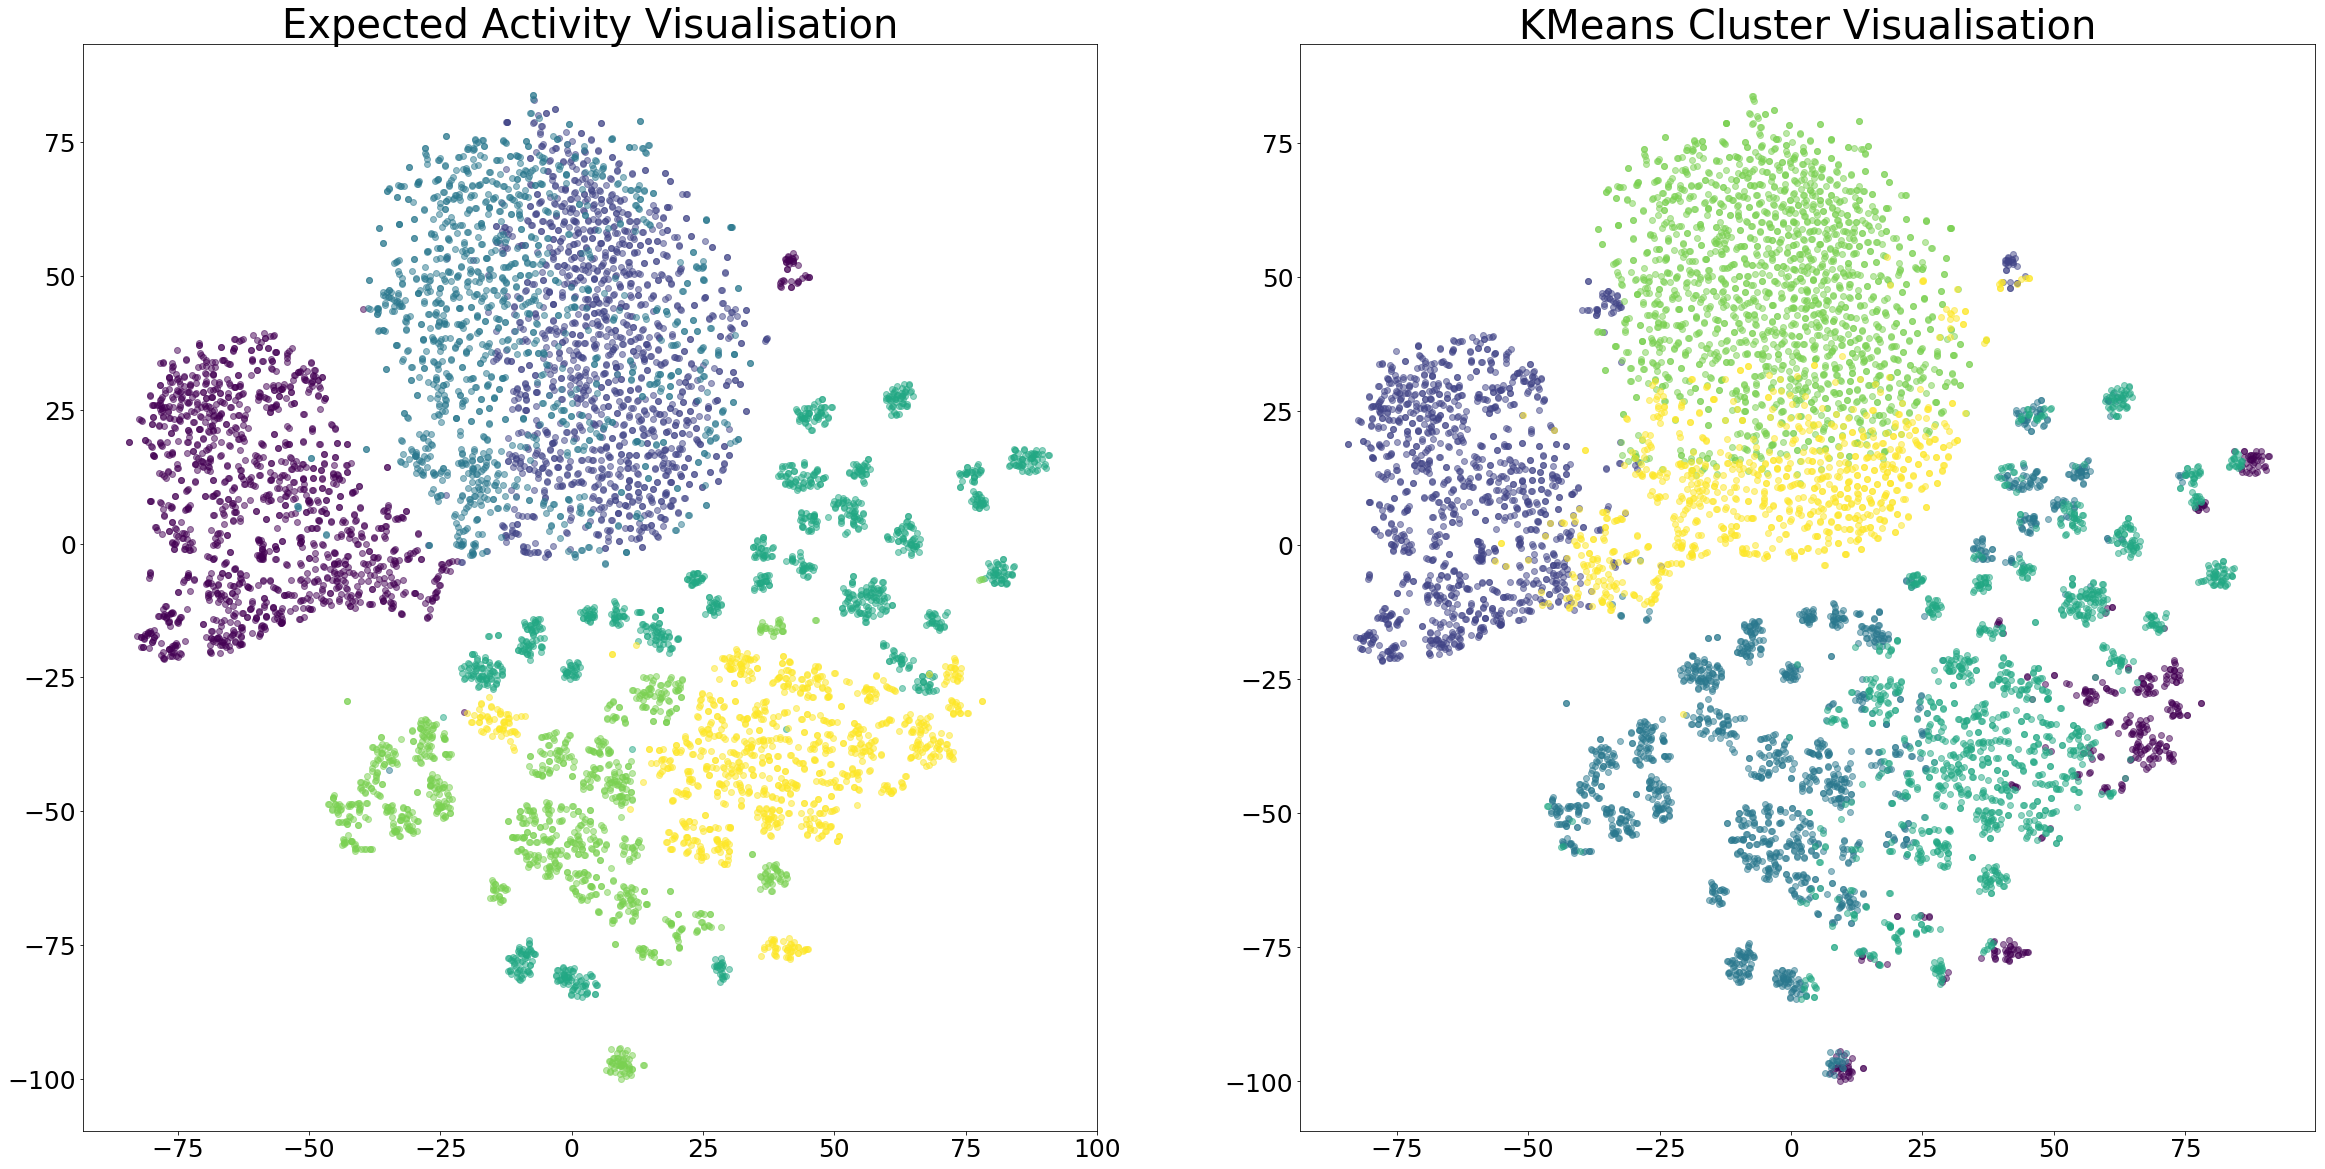

In [25]:
Y_train = df.Activity.copy()
label_counts = Y_train.value_counts()

n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]
fig = plt.figure(figsize = (40,20))

axes1 = fig.add_subplot(121)
axes1.set_title('Expected Activity Visualisation', fontdict = {'fontsize': 40})
plt.setp(axes1.get_xticklabels(), Fontsize=25)
plt.setp(axes1.get_yticklabels(), Fontsize=25)
for i, group in enumerate(label_counts.index):
    mask = (Y_train==group).values
    axes1.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

axes2 = fig.add_subplot(122)
axes2.set_title('KMeans Cluster Visualisation', fontdict = {'fontsize': 40})
plt.setp(axes2.get_xticklabels(), Fontsize=25)
plt.setp(axes2.get_yticklabels(), Fontsize=25)
for i, group in enumerate(label_counts.index):
    mask = (kmeans.labels_==i)
    axes2.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

#### Calculating and plotting the heatmap of the output of the K-Means model

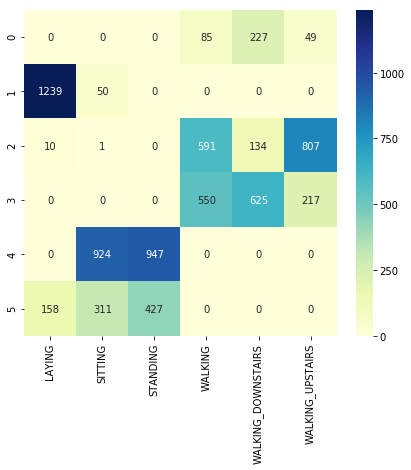

In [26]:
l = [0,0,0,0,0,0]
label_acc={'LAYING':l.copy(), 'SITTING':l.copy(), 'STANDING': l.copy(), 'WALKING':l.copy(), 'WALKING_DOWNSTAIRS':l.copy(), 'WALKING_UPSTAIRS':l.copy()}
for i in range(len(kmeans.labels_)):
    label_acc[Y_train[i]][kmeans.labels_[i]] += 1

label_acc = pd.DataFrame(label_acc, columns = ['LAYING', 'SITTING','STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'])
fig = plt.figure(figsize = (7,6))
axes1 = fig.add_subplot(111)
plt.setp(axes1.get_xticklabels(), fontsize = 10)
plt.setp(axes1.get_yticklabels(), fontsize = 10)
s = sns.heatmap(label_acc, cmap = "YlGnBu", annot = True, fmt="d", ax = axes1)

## **K-Means Clustering Algorithm for 2 Clusters**
The code in this section takes the Test dataset and runs the K-Means clustering algorithm. It classfies the datapoints into Static and Dynamic Activities and shows the results

#### Performing K-means for 2 clusters

In [27]:
kmeans = KMeans(n_clusters=2, init='random', max_iter=300, n_init=20, random_state=0)
pred_y = kmeans.fit_predict(df1)

#### Plotting the t-SNE reduced data showing the distribution of static and dynamic activites in the output of the model as well as the expected output

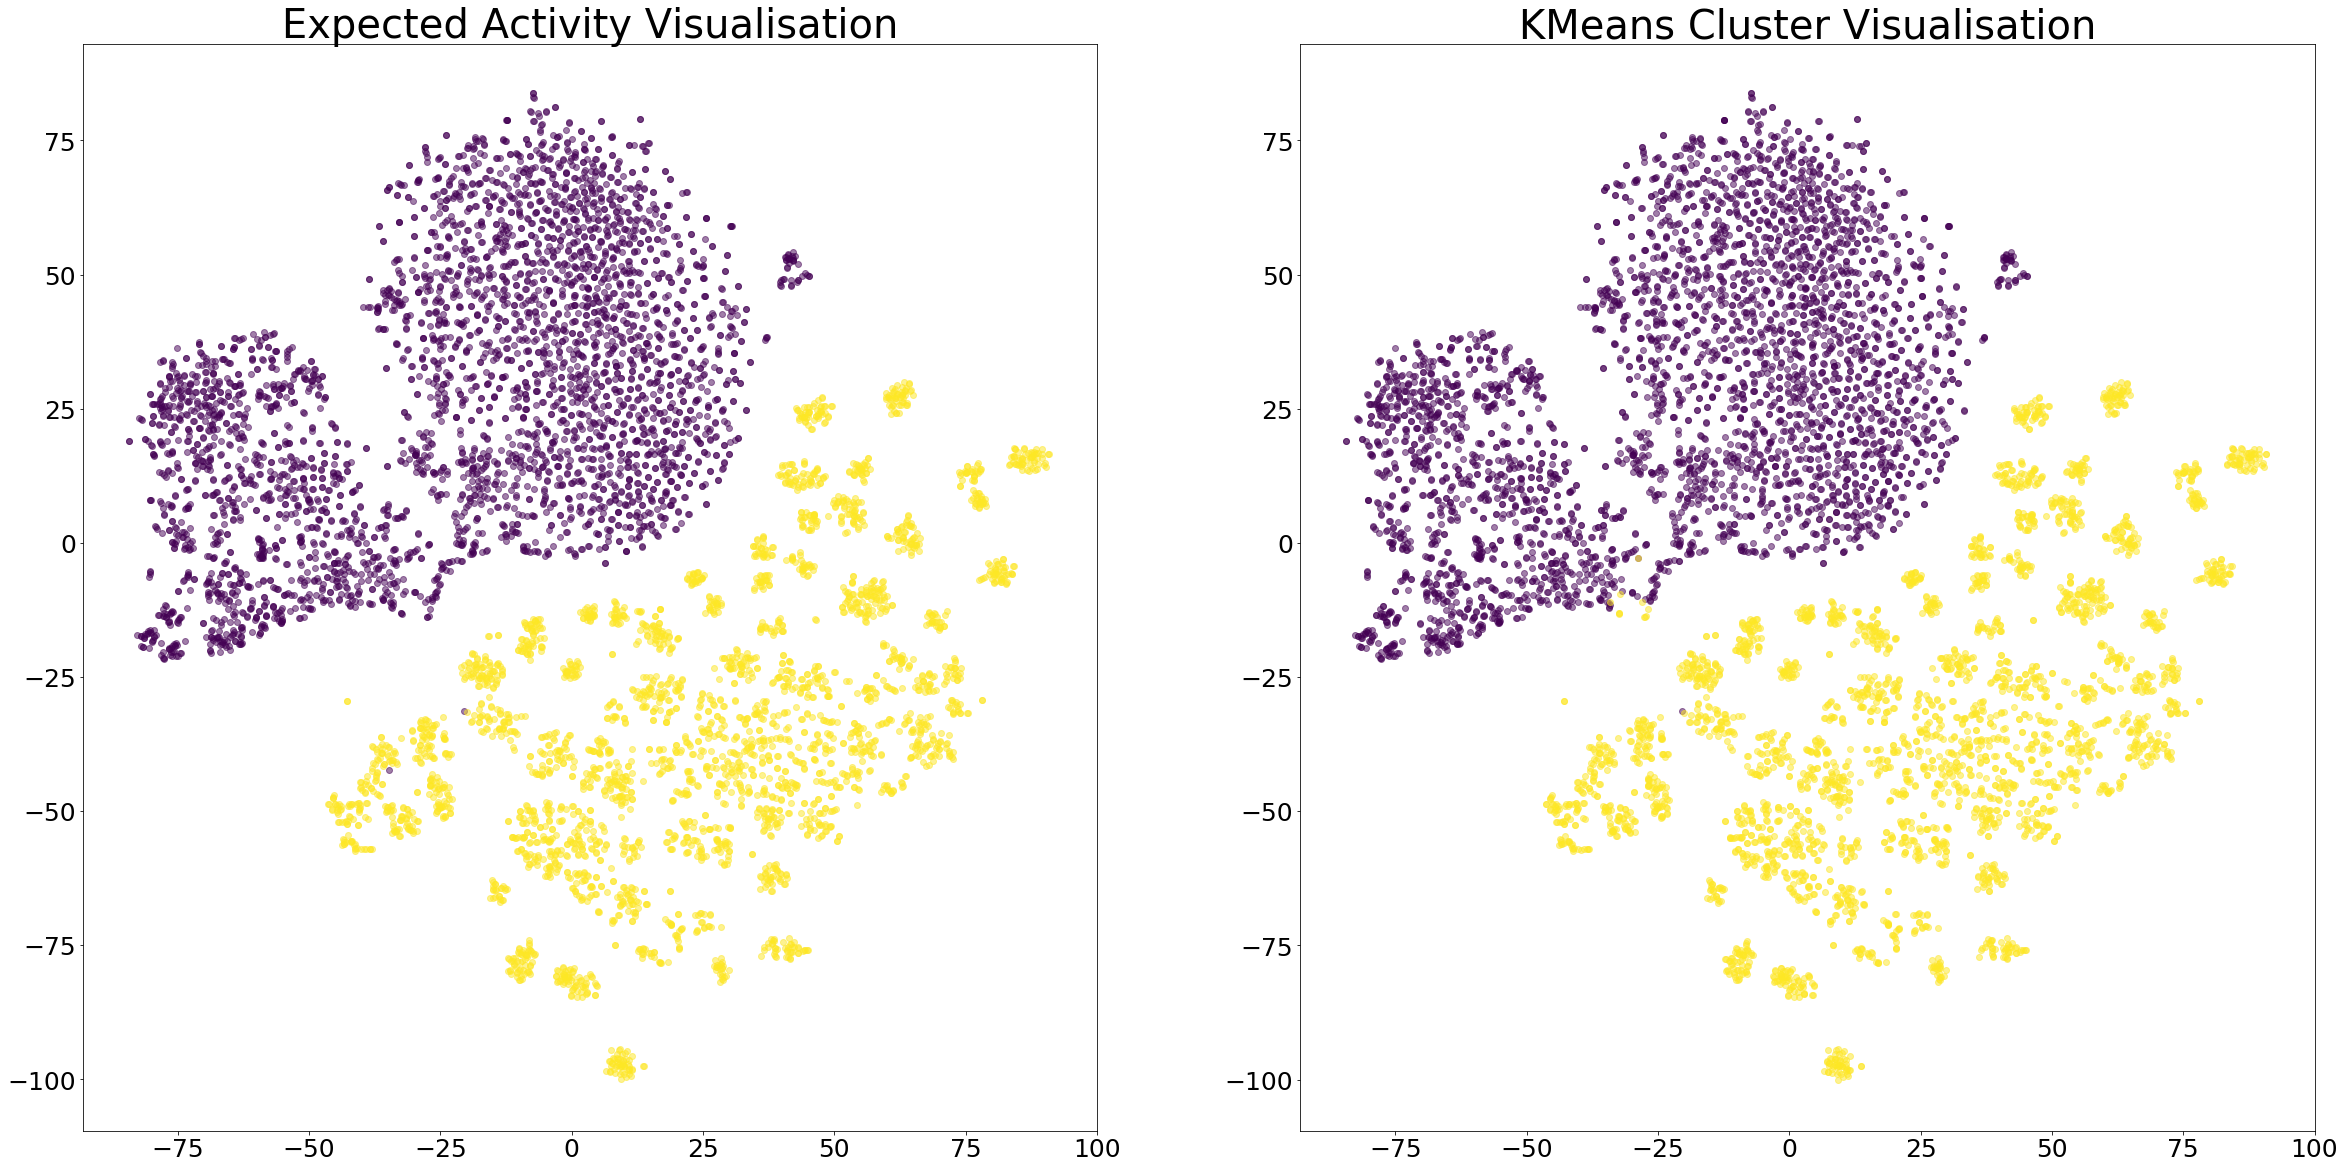

In [28]:
Y_train = df.Activity.copy()

for i in range(len(Y_train)):
    if(Y_train[i] == 'LAYING' or Y_train[i] == 'STANDING' or Y_train[i] == 'SITTING'):
        Y_train[i] = "STATIC"
    else:
        Y_train[i] = "DYNAMIC"
label_counts = Y_train.value_counts()

n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]
fig = plt.figure(figsize = (40,20))

#plot of the classified data
axes1 = fig.add_subplot(121)
axes1.set_title('Expected Activity Visualisation', fontdict = {'fontsize': 40})
plt.setp(axes1.get_xticklabels(), Fontsize=25)
plt.setp(axes1.get_yticklabels(), Fontsize=25)
for i, group in enumerate(label_counts.index):
    mask = (Y_train==group).values
    axes1.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

#plot of the expected data
axes2 = fig.add_subplot(122)
axes2.set_title('KMeans Cluster Visualisation', fontdict = {'fontsize': 40})
plt.setp(axes2.get_xticklabels(), Fontsize=25)
plt.setp(axes2.get_yticklabels(), Fontsize=25)
for i, group in enumerate(label_counts.index):
    mask = (kmeans.labels_==i)
    axes2.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

#### Calculating and plotting the heatmap of the output of the K-Means model

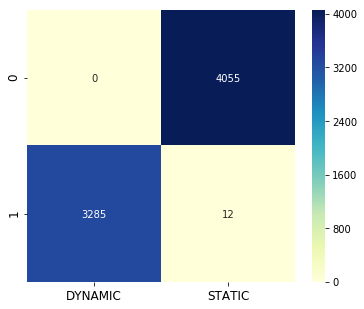

In [29]:
c = {"DYNAMIC":[0,0],"STATIC":[0,0]}

c_d = pd.DataFrame(c, columns = ["DYNAMIC", "STATIC"])
for i in range(len(Y_train)):
    c_d[Y_train[i]][kmeans.labels_[i]] += 1

fig = plt.figure(figsize = (6,5))
axes1 = fig.add_subplot(111)
plt.setp(axes1.get_xticklabels(), Fontsize=12)
plt.setp(axes1.get_yticklabels(), Fontsize=12)
s = sns.heatmap(c_d, cmap = "YlGnBu", annot = True, fmt="d", ax = axes1)

# **Artificial Neural Networks**

In [30]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Checking for null and duplicate values in train and test set

In [31]:
train.isnull().any()

tBodyAcc-mean()-X                       False
tBodyAcc-mean()-Y                       False
tBodyAcc-mean()-Z                       False
tBodyAcc-std()-X                        False
tBodyAcc-std()-Y                        False
tBodyAcc-std()-Z                        False
tBodyAcc-mad()-X                        False
tBodyAcc-mad()-Y                        False
tBodyAcc-mad()-Z                        False
tBodyAcc-max()-X                        False
tBodyAcc-max()-Y                        False
tBodyAcc-max()-Z                        False
tBodyAcc-min()-X                        False
tBodyAcc-min()-Y                        False
tBodyAcc-min()-Z                        False
tBodyAcc-sma()                          False
tBodyAcc-energy()-X                     False
tBodyAcc-energy()-Y                     False
tBodyAcc-energy()-Z                     False
tBodyAcc-iqr()-X                        False
tBodyAcc-iqr()-Y                        False
tBodyAcc-iqr()-Z                  

In [32]:
test.isnull().any()

tBodyAcc-mean()-X                       False
tBodyAcc-mean()-Y                       False
tBodyAcc-mean()-Z                       False
tBodyAcc-std()-X                        False
tBodyAcc-std()-Y                        False
tBodyAcc-std()-Z                        False
tBodyAcc-mad()-X                        False
tBodyAcc-mad()-Y                        False
tBodyAcc-mad()-Z                        False
tBodyAcc-max()-X                        False
tBodyAcc-max()-Y                        False
tBodyAcc-max()-Z                        False
tBodyAcc-min()-X                        False
tBodyAcc-min()-Y                        False
tBodyAcc-min()-Z                        False
tBodyAcc-sma()                          False
tBodyAcc-energy()-X                     False
tBodyAcc-energy()-Y                     False
tBodyAcc-energy()-Z                     False
tBodyAcc-iqr()-X                        False
tBodyAcc-iqr()-Y                        False
tBodyAcc-iqr()-Z                  

In [33]:
print(sum(train.duplicated()))
print(sum(test.duplicated()))

0
0


### Cross tabulation of all activities

In [34]:
pd.crosstab(train.subject, train.Activity, margins=True).style.background_gradient(cmap='autumn_r')

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
3,62,52,61,58,49,59,341
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
11,57,53,47,59,46,54,316
14,51,54,60,59,45,54,323
15,72,59,53,54,42,48,328


### Creating variables for train and test

In [35]:

X_train=train.iloc[:,:-2]
y_train=train.iloc[:,-1]

X_test=test.iloc[:,:-2]
y_test=test.iloc[:,-1]

### Scaling the features

In [36]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Encoding the labels (y)

In [37]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

y_train=encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values


y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values

### Calculating explained variance using PCA

In [38]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

print(explained_variance)

[5.07811723e-01 6.58068027e-02 2.80643677e-02 2.50395275e-02
 1.88828501e-02 1.72400642e-02 1.37101147e-02 1.19907768e-02
 9.95859511e-03 9.65086590e-03 8.60051649e-03 8.00280950e-03
 7.63996369e-03 6.45328924e-03 6.32324346e-03 5.99722090e-03
 5.86750302e-03 5.75407392e-03 5.67921047e-03 5.27295779e-03
 5.00362925e-03 4.88408406e-03 4.78205784e-03 4.68562930e-03
 4.49289260e-03 4.21027243e-03 4.17978682e-03 4.05570369e-03
 3.88524168e-03 3.87018044e-03 3.65958878e-03 3.54553381e-03
 3.47942606e-03 3.37187109e-03 3.29676999e-03 3.28215050e-03
 3.20529478e-03 2.95614939e-03 2.86722415e-03 2.85074548e-03
 2.68766324e-03 2.65619859e-03 2.63405989e-03 2.58850596e-03
 2.49054872e-03 2.46954034e-03 2.40679913e-03 2.36115075e-03
 2.30278857e-03 2.27567245e-03 2.20164699e-03 2.13466984e-03
 2.07704456e-03 2.02496620e-03 1.99779441e-03 1.97750625e-03
 1.94273627e-03 1.90237160e-03 1.88064891e-03 1.86215970e-03
 1.81466544e-03 1.77380987e-03 1.76085074e-03 1.73283909e-03
 1.70738317e-03 1.685480

In [39]:
#Shape of features 
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(7352, 561) (7352, 6)
(2947, 561) (2947, 6)


In [42]:
!pip install tensorflow
!pip install keras 
import keras 

### Callbacks and checkpointing 

In [43]:
filepath="HAR_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [44]:
#making the necesssary imports 
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense,Dropout,BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam #Can try with other optimizers like RMSprop and others

### Definition of the model - Tweak the layers and perform other hyperparameters tuning for testing

In [45]:
model = Sequential()

#Add dense layers (4-5)
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))

#Can try to add BatchNormalization here to improve accuracy 
model.add(BatchNormalization())
model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax')) #Using softmax instead of sigmoid 

### Compile the model and get the summary

In [46]:
 
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])  #Can explicitly set learning rate and tweak it to see change in results 

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                35968     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total params: 55,078
Trainable params: 54,950
Non-trainable params: 128
__________________________________________________

### Ftting the model based on the train and test data, 50 epochs and a batch size of 256 (found to have shown the best results)

In [47]:
#try tweaking the batch size and the number of epochs to check for best results 
history = model.fit(X_train, y_train , epochs=50 , batch_size = 256 , validation_data=(X_test, y_test) , callbacks=[checkpoint,lr_reduce])

Epoch 1/50
29/29 [==============================] - 0s 11ms/step - loss: 1.6228 - accuracy: 0.4646 - val_loss: 1.2798 - val_accuracy: 0.3539
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 0.8833 - accuracy: 0.5220 - val_loss: 0.7605 - val_accuracy: 0.5640
Epoch 3/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5357 - accuracy: 0.7058 - val_loss: 0.5132 - val_accuracy: 0.7954
Epoch 4/50
29/29 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.8490 - val_loss: 0.3591 - val_accuracy: 0.8045
Epoch 5/50
29/29 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 0.8925 - val_loss: 0.3585 - val_accuracy: 0.8629
Epoch 6/50
29/29 [==============================] - 0s 4ms/step - loss: 0.0580 - accuracy: 0.9899 - val_loss: 0.2602 - val_accuracy: 0.9294
Epoch 7/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9920 - val_loss: 0.2388 - val_accuracy: 0.9345
Epoch 8/50
29/29 [=

Epoch 19/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.4315 - val_accuracy: 0.9315
Epoch 20/50
29/29 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.3892 - val_accuracy: 0.9389
Epoch 21/50
29/29 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.4262 - val_accuracy: 0.9325
Epoch 22/50
29/29 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.3993 - val_accuracy: 0.9389
Epoch 23/50
29/29 [==============================] - 0s 6ms/step - loss: 9.9155e-04 - accuracy: 0.9997 - val_loss: 0.3951 - val_accuracy: 0.9399
Epoch 24/50
29/29 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.4046 - val_accuracy: 0.9382
Epoch 25/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.4255 - val_accuracy: 0.9369
Epoch 26/

Epoch 37/50
29/29 [==============================] - 0s 3ms/step - loss: 9.0474e-04 - accuracy: 0.9997 - val_loss: 0.3986 - val_accuracy: 0.9430
Epoch 38/50
29/29 [==============================] - 0s 3ms/step - loss: 2.7217e-04 - accuracy: 1.0000 - val_loss: 0.4023 - val_accuracy: 0.9416
Epoch 39/50
29/29 [==============================] - 0s 3ms/step - loss: 1.9370e-04 - accuracy: 1.0000 - val_loss: 0.4104 - val_accuracy: 0.9403
Epoch 40/50
29/29 [==============================] - 0s 3ms/step - loss: 6.1811e-04 - accuracy: 0.9997 - val_loss: 0.4232 - val_accuracy: 0.9399
Epoch 41/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4205 - val_accuracy: 0.9399
Epoch 42/50
29/29 [==============================] - 0s 3ms/step - loss: 2.5954e-04 - accuracy: 1.0000 - val_loss: 0.4409 - val_accuracy: 0.9348
Epoch 43/50
29/29 [==============================] - 0s 3ms/step - loss: 2.7421e-04 - accuracy: 1.0000 - val_loss: 0.4426 - val_accura

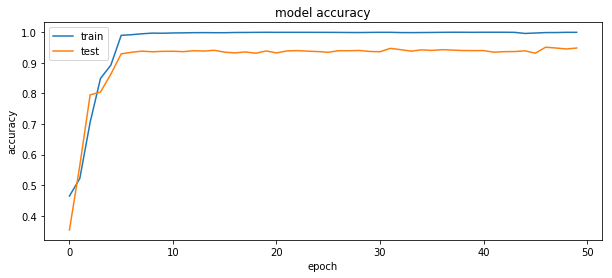

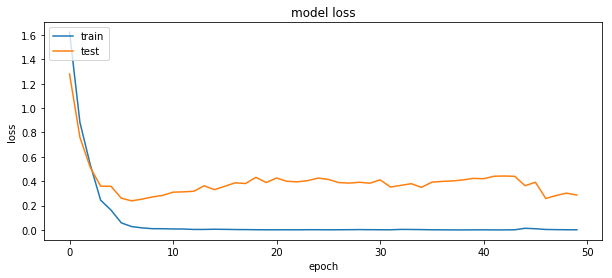

In [48]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
y_pred = model.predict(X_test)

y_pred_class = np.argmax(y_pred,axis=1)

y_test_class = np.argmax(y_test,axis=1)

In [50]:
y_test_class

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

In [51]:
y_pred_class

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)